# 1. Comparing Quality of Samples of Multivariate Gaussians from Various Packages

In order to verify the validity of the data we have generated we will show that it coroborates with known theoretical results. This section shows that our random number generation is unbiased using two methods. The first will graph the random variable defined as the maxima of standard normal process minus the expected value of that process. The second will show 

In [1]:
import numpy as np
import pandas as pd

# For plotting data
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

%matplotlib inline

## Import Data
We need to import the following csv files to run statistical tests on them.
### C++ Generated Data
 - C++ MT19937 Data
 - Armadillo C++ Data using mvrnd()
 
### Python Generated Data
 - NumPy PCG64 Data
 - Jupyter PCG64 Data
 - (TO DO) SciPy QMC Multivariate Normal Data

For some strange reason, it seems that generating the data using Jupyter Notebooks gives us higher quality (i.e. lower correlation) data for our simulations. Thus, we are considering reading the data in from CSV's after we pre-generate it in Jupyter.

In [2]:
""" C++ MT19937 Generated Data """

File = r"~/FGF-manifold-simulator/Data/maxData_CPP_MT19937_n_10000_trials_20000.csv"

colnames=['max', 'exp'] 
data = pd.read_csv(File, names=colnames)

MaxData_CPP_MT19937 = np.array(data['max'])

In [3]:
""" C++ Armadillo Multivariate Normal Data """
File = r"~/FGF-manifold-simulator/Data/samples_CPP_armadillo_mvrnd_n_10000_trials_20000.csv"

colnames=[f'{i}' for i in range(10000)]
test_data = np.array(pd.read_csv(File, names=colnames))

MaxData_CPP_Armadillo = np.amax(test_data, axis=1)

In [5]:
""" Python PCG64 Numpy Pre-Generated Data """

File = r"~/FGF-manifold-simulator/Data/samples_NUMPY_PCG64_n_10000_trials_20000.csv"

colnames=[f'{i}' for i in range(10000)]
test_data = np.array(pd.read_csv(File, names=colnames))

# compute the maximum of sample vector (that is the max of each row)
# and store it in an array
MaxData_NUMPY_PCG64 = np.amax(test_data, axis=1)

In [7]:
""" Python PCG64 Jupyter Pre-Generated Data """

File = r"~/FGF-manifold-simulator/Data/samples_Jupyter_PCG64_n_40000_trials_20000.csv"

colnames=[f'{i}' for i in range(40000)]
Jupyter_Random_Data = np.array(pd.read_csv(File, names=colnames))

# need to format numpy array to have dimensions 10000 x 20000
Jupyter_Random_Data_Formatted = Jupyter_Random_Data[0:10000,0:20000]

# compute the maximum of sample vector (that is the max of each row)
# and store it in an array
MaxData_Jupyter_PCG64 = np.amax(Jupyter_Random_Data_Formatted, axis=1)

In [ ]:
"""
TODO: NEED TO GENERATE DATA BUT ISSUES OCCUR WITH PYTHON VERSION
"""
""" Python SciPy Quasi-Monte-Carlo (QMC) Multivariate Normal Pre-Generated Data """

File = r"~/FGF-manifold-simulator/Data/samples_NUMPY_PCG64_n_10000_trials_20000.csv"

colnames=[f'{i}' for i in range(10000)]
test_data = np.array(pd.read_csv(File, names=colnames))

# compute the maximum of sample vector (that is the max of each row)
# and store it in an array
MaxData_NUMPY_PCG64 = np.amax(test_data, axis=1)

### Control Data
For good measure, we also generate some random vectors using this notebook's PCG64 generator. Using this data, we compute the maximum of each vector sampled and store these values in an array to compare their quality with the other data generated.

In [10]:
# PYTHON CONTROL DATA USING PCG64 - the modern one
from numpy.random import default_rng
rng = default_rng()

def computeMn_PCG64(nval):
    vals=rng.standard_normal(nval)
    return np.max(vals)

def sampleMn_PCG64(nval, numTrials):
    Mn_array = []
    for j in range(numTrials):
        Mn_array.append(computeMn_PCG64(nval))
    return np.array(Mn_array)

MaxData_Jupyter_PCG64_Control = sampleMn_PCG64(n,20000)  

# Convergence in Distribution
The first test we run verifies whether or not the sampled data agrees with the following fact:

If $(X_n)_n{\in\mathbb{N}}$ is a sequence of i.i.d standard normal random variables, then the variable
$M_n=\max_{0\leq j\leq n} X_j$ obeys the following limit law:
$$
    \mathbb{P}\left(a_n(M_n-b_n)\leq x\right) \xrightarrow{dist} \exp(-\exp(-x))
$$
where
$$
        a_n = \sqrt{2\log(n)} \quad b_n = \sqrt{2\log(n)} - \frac{1}{2}(2\log(n)^{-\frac{1}{2}}(\log(\log(n))+\log(4\pi))
$$

To test this, we will plot the maxima data that we collected from the various sources in histograms and check
which datasets converge in this manner.

In [12]:
# parameters for the pdf of limiting distribution of EM_n
n=10000

def a(n):
    return np.sqrt(2*np.log(n))

def b(n):
    return np.sqrt(2*np.log(n)) - 0.5*pow(2*np.log(n), -0.5)*(np.log(np.log(n))+np.log(4*np.pi))

def pdf(x):
    return np.exp(-x-np.exp(-x))

In [34]:
# shift data and scale accordingly by a(n) and b(n)
MaxData_CPP_MT19937_Scaled = a(n)*(MaxData_CPP_MT19937-b(n))
MaxData_CPP_Armadillo_Scaled = a(n)*(MaxData_CPP_Armadillo-b(n))
MaxData_NUMPY_PCG64_Scaled = a(n)*(MaxData_NUMPY_PCG64-b(n))
MaxData_Jupyter_PCG64_Scaled = a(n)*(MaxData_Jupyter_PCG64-b(n))
MaxData_Jupyter_PCG64_Control_Scaled = a(n)*(MaxData_Jupyter_PCG64_Control-b(n))

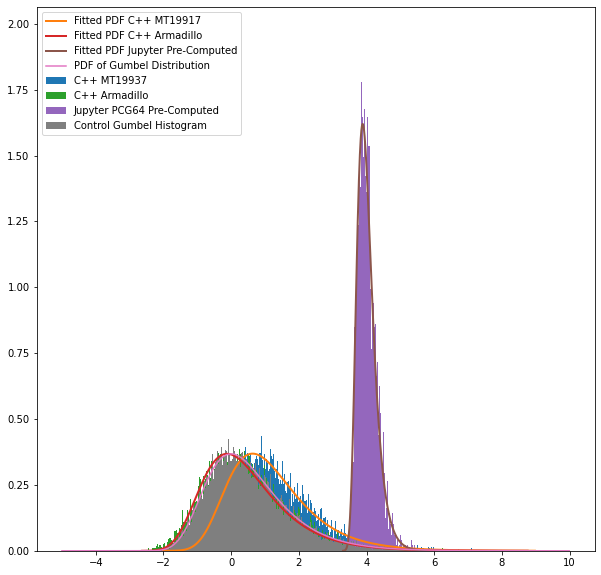

In [24]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

hist = True

# Plot the Histogram and Fitted PDF of the C++ MT19937 Data
(counts1, bins1) = np.histogram(MaxData_CPP_MT19937_Scaled, bins=500)
if hist:
    plt.hist(bins1[:-1], bins1, weights=counts1, density=True, label="C++ MT19937")
beta1 = np.std(MaxData_CPP_MT19937_Scaled) * np.sqrt(6) / np.pi
mu1 = np.mean(MaxData_CPP_MT19937_Scaled) - 0.57721*beta1
plt.plot(bins1, (1/beta1)*np.exp(-(bins1 - mu1)/beta1)
         * np.exp(-np.exp(-(bins1 - mu1)/beta1)),
         linewidth=2, label="Fitted PDF C++ MT19917")

# Plot the Histogram and Fitted PDF of the C++ Armadillo Data
(counts2, bins2) = np.histogram(MaxData_CPP_Armadillo_Scaled, bins=500)
if hist:
    plt.hist(bins2[:-1], bins2, weights=counts2, density=True, label="C++ Armadillo")
beta2 = np.std(MaxData_CPP_Armadillo_Scaled) * np.sqrt(6) / np.pi
mu2 = np.mean(MaxData_CPP_Armadillo_Scaled) - 0.57721*beta2
plt.plot(bins2, (1/beta2)*np.exp(-(bins2 - mu2)/beta2)
         * np.exp(-np.exp(-(bins2 - mu2)/beta2)),
         linewidth=2, label="Fitted PDF C++ Armadillo")

"""THIS THROWS AN ERROR- UNSURE WHY
"""
# Plot the Histogram and Fitted PDF of the NUMPY PCG64 Data
# (counts3, bins3) = np.histogram(MaxData_NUMPY_PCG64_Scaled, bins=500)
# if hist:
#     plt.hist(bins3[:-1], bins3, weights=counts3, density=True, label="NUMPY PCG64")
# beta3 = np.std(MaxData_NUMPY_PCG64_Scaled) * np.sqrt(6) / np.pi
# mu3 = np.mean(MaxData_NUMPY_PCG64_Scaled) - 0.57721*beta3
# plt.plot(bins3, (1/beta3)*np.exp(-(bins3 - mu3)/beta3)
#          * np.exp(-np.exp(-(bins3 - mu3)/beta3)),
#          linewidth=2, label="Fitted PDF NUMPY PCG64")

# Plot the Histogram and Fitted PDF of the C++ Generated Data
(counts4, bins4) = np.histogram(MaxData_Jupyter_PCG64, bins=500)
if hist:
    plt.hist(bins4[:-1], bins4, weights=counts1, density=True, label="Jupyter PCG64 Pre-Computed")
beta4 = np.std(MaxData_Jupyter_PCG64) * np.sqrt(6) / np.pi
mu4 = np.mean(MaxData_Jupyter_PCG64) - 0.57721*beta4
plt.plot(bins4, (1/beta4)*np.exp(-(bins4 - mu4)/beta4)
         * np.exp(-np.exp(-(bins4 - mu4)/beta4)),
         linewidth=2, label="Fitted PDF Jupyter Pre-Computed")

# Plot the Limit PDF of Gumbel and Histogram of Sample
ax1.plot(X, pdf(X), label="PDF of Gumbel Distribution")
if hist:
    control_gumbel = np.random.gumbel(0, 1, 20000)
    count, bins = np.histogram(control_gumbel, 500)
    plt.hist(bins[:-1], bins, weights=count, density=True, label="Control Gumbel Histogram")

plt.legend(loc="upper left")
plt.show()

## Analysis of Different Random Number Engines:
We can see that the pre-saved Jupyter Data is incredibly skewed, which disagrees with the expectation. Moreover, we see that the C++ built in MT19937 algorithm seems to give correlated data even when it has different seeds, yielding a higher expected value of $M_n$ and hence $a_n(M_n-b_n)$. Moreover, the pre-written NumPy PCG64 data appears to not be written correctly, giving larger results.

**Takeaways: We see that C++ Armadillo works well, and for the forseeable future, we intend to use it in our simulations**

Other Notes
- I noticed in the code that trent sent me to generate the Jupyter Pre-Computed PCG64 data, the new line delimiters were different, which makes me wonder if perhaps this caused an error in data processing.
- Again, same thing with writing, reading, and parsing the NUMPY PCG64 Data

Below, we include some other figures that highlight the convergence of the C++ Armadillo data to the theoretical distribution.

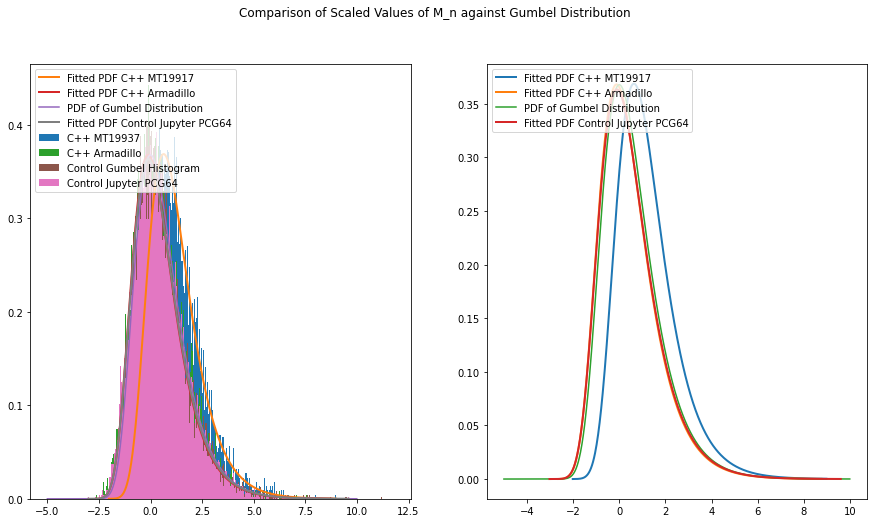

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Comparison of Scaled Values of M_n against Gumbel Distribution')

# Plot the Histogram and Fitted PDF of the C++ MT19937 Data
(counts1, bins1) = np.histogram(MaxData_CPP_MT19937_Scaled, bins=500)
ax1.hist(bins1[:-1], bins1, weights=counts1, density=True, label="C++ MT19937")
beta1 = np.std(MaxData_CPP_MT19937_Scaled) * np.sqrt(6) / np.pi
mu1 = np.mean(MaxData_CPP_MT19937_Scaled) - 0.57721*beta1
ax1.plot(bins1, (1/beta1)*np.exp(-(bins1 - mu1)/beta1)
         * np.exp(-np.exp(-(bins1 - mu1)/beta1)),
         linewidth=2, label="Fitted PDF C++ MT19917")
ax2.plot(bins1, (1/beta1)*np.exp(-(bins1 - mu1)/beta1)
         * np.exp(-np.exp(-(bins1 - mu1)/beta1)),
         linewidth=2, label="Fitted PDF C++ MT19917")

# Plot the Histogram and Fitted PDF of the C++ Armadillo Data
(counts2, bins2) = np.histogram(MaxData_CPP_Armadillo_Scaled, bins=500)
ax1.hist(bins2[:-1], bins2, weights=counts2, density=True, label="C++ Armadillo")
beta2 = np.std(MaxData_CPP_Armadillo_Scaled) * np.sqrt(6) / np.pi
mu2 = np.mean(MaxData_CPP_Armadillo_Scaled) - 0.57721*beta2
ax1.plot(bins2, (1/beta2)*np.exp(-(bins2 - mu2)/beta2)
         * np.exp(-np.exp(-(bins2 - mu2)/beta2)),
         linewidth=2, label="Fitted PDF C++ Armadillo")
ax2.plot(bins2, (1/beta2)*np.exp(-(bins2 - mu2)/beta2)
         * np.exp(-np.exp(-(bins2 - mu2)/beta2)),
         linewidth=2, label="Fitted PDF C++ Armadillo")


# Plot the Limit PDF of Gumbel and Histogram of Sample
ax1.plot(X, pdf(X), label="PDF of Gumbel Distribution")
ax2.plot(X, pdf(X), label="PDF of Gumbel Distribution")
control_gumbel = np.random.gumbel(0, 1, 20000)
count, bins = np.histogram(control_gumbel, 500)
ax1.hist(bins[:-1], bins, weights=count, density=True, label="Control Gumbel Histogram")

# Plot the Histogram and Fitted PDF of the C++ Armadillo Data
(counts3, bins3) = np.histogram(MaxData_Jupyter_PCG64_Control_Scaled, bins=500)
ax1.hist(bins3[:-1], bins3, weights=counts3, density=True, label="Control Jupyter PCG64")
beta3 = np.std(MaxData_Jupyter_PCG64_Control_Scaled) * np.sqrt(6) / np.pi
mu3 = np.mean(MaxData_Jupyter_PCG64_Control_Scaled) - 0.57721*beta3
ax1.plot(bins3, (1/beta3)*np.exp(-(bins3 - mu3)/beta3)
         * np.exp(-np.exp(-(bins3 - mu3)/beta3)),
         linewidth=2, label="Fitted PDF Control Jupyter PCG64")
ax2.plot(bins3, (1/beta3)*np.exp(-(bins3 - mu3)/beta3)
         * np.exp(-np.exp(-(bins3 - mu3)/beta3)),
         linewidth=2, label="Fitted PDF Control Jupyter PCG64")


ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.show()

# Expected Value as n Increases
We know from Leadbetter et. al. that if $(X_n)_{n\in\mathbb{N}}$ is a sequence of $\mathcal{N}(0,1)$
i.i.d variables and $M_n=\max_{0\leq j\leq n}X_j$, then
$$
\mathbb{E}M_n \approx \sqrt(2\log(n)-\frac{1}{2}(2\log(n))^{-\frac{1}{2}}(\log\log(n)+\log(4\pi))
$$
Using this, we can plot and compare the empirical value of $\mathbb{E}M_n$ against the known
theoretical value. As it turns out, the empirical data that we generated agrees with the theory.

In [13]:
File = r'/Users/connormarrs/Math/FGF-manifold-simulator/Data/MaxDist/gaussian_expected_maxima50000.csv'

colnames=['n', 'exp'] 
data = pd.read_csv(File, names=colnames)

EXP = np.array(data['exp'])
N = np.array(data['n'])

In [14]:
# Computing the Python EMn data
def sample_EMn(numTrials):
    EMn_array = []
    for n in N:
        EMn_array.append(
            np.mean(sampleMn_PCG64(n, numTrials))
        )
    return EMn_array

Control_Exp_Data_PCG64 = sample_EMn(2000)  

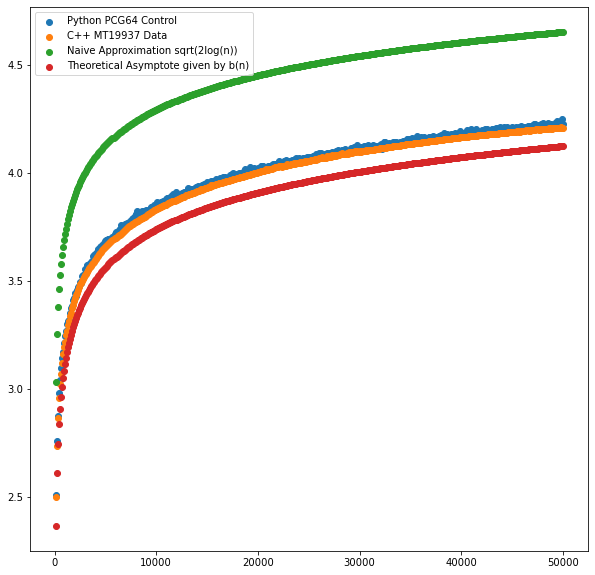

In [15]:
fig = plt.figure(figsize =(10,10))
plt.scatter(N,Control_Exp_Data_PCG64, label="Python PCG64 Control")
plt.scatter(N, EXP, label="C++ MT19937 Data")
plt.scatter(N, np.sqrt(2*np.log(N)), label="Naive Approximation sqrt(2log(n))")
plt.scatter(N, b(N), label="Theoretical Asymptote given by b(n)")
plt.legend(loc="upper left")
plt.show()

# Brownian Bridge

In [19]:
File = r'/Users/connormarrs/Math/gaussian-free-fields-reu/data/MaxDist/2500_0.500000.csv'

In [20]:
colnames=['max', 'exp'] 
data = pd.read_csv(File, names=colnames)

MaxData = list(data['max'])
M = data['exp'][0]

In [21]:
Diff = []

for x in range(len(MaxData)):
    Diff.append(MaxData[x] - M)

In [ ]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

ax1.hist(x=MaxData, bins=int(np.floor(len(MaxData)*.05)))
ax1.plot(P, BPDF(P))
plt.show()

In [ ]:
def BPDF(x):
    return (4*x/np.pi)*np.exp((-2*x**2)/(np.pi))

In [ ]:
P = [x for x in range(0,3)]

P = np.array(P)

In [33]:
address = '/Users/connormarrs/Math/gaussian-free-fields-reu/data/Maxima'

In [34]:
# min N, Max N, step-size
N_Data = ['500','1950','10']

# min S, max S, step-size
S_Data = ['0.0','0.5','.001']

# creates a variable for the .format() function which call specified files in \Maxima
Folder = address + '/{}_s0.0-0.5.csv'

In [35]:
# For some reason trying to create mlist in the function above breaks things
nlist = []
slist = []
mlist = []

for n in range(int(N_Data[0]), int(N_Data[1])+int(N_Data[2]), int(N_Data[2])):
    filenew = Folder.format(n)
    
    colnames=['n', 's','m'] 
    numbers = pd.read_csv(filenew, names=colnames)
    
    nlist.append(list(numbers['n']))
    slist.append(list(numbers['s']))
    mlist.append(list(numbers['m']))

In [36]:
S = .5

In [37]:
# The index function tells us the index of our S value so we can ensure a proper zip with the future m values
Index = slist[0].index(S)

In [38]:
nFixed = []
mFixed = []

for s in range(len(slist)):
    if S in slist[s]:
        nFixed.append(nlist[s][Index])
        mFixed.append(mlist[s][Index])
        
nFixed = np.array(nFixed)
mFixed = np.array(mFixed)

In [39]:
def asymptotic(x):
    return np.sqrt(np.pi/2)*np.pi/(2*np.sqrt(2))

asymptotic_array = []

for x in range(len(nFixed)):
    asymptotic_array.append(asymptotic(x))

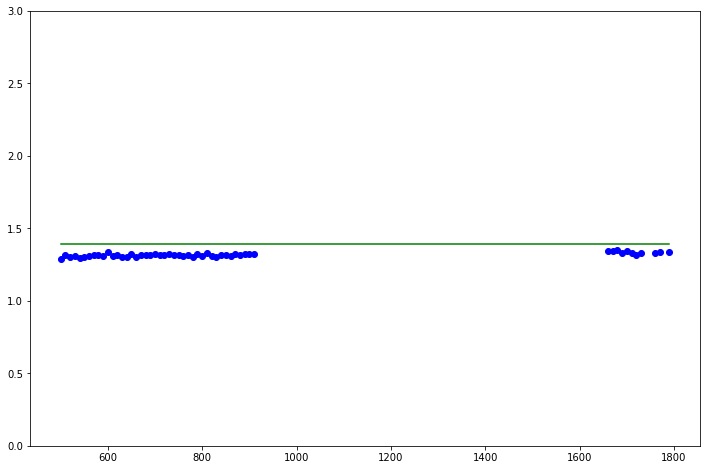

In [40]:
%matplotlib inline
f = plt.figure(figsize = (12,8))
ax1 = plt.subplot(111)
ax1.set_ylim(0,int(np.ceil(max(mFixed)))+1)

ax1.scatter(nFixed, mFixed, c='blue')
ax1.plot(nFixed, asymptotic_array, c='green')
